In [12]:
import pandas as pd

daily_por_tramo = pd.read_csv("C:/Users/usuario/Desktop/TFG/predicciones/daily_por_tramo_4_1.csv", index_col=0)

In [13]:
daily_por_tramo

,HS10_min,HS10_mean,HS10_max,HS20_min,HS20_mean,HS20_max,HS30_min,HS30_mean,HS30_max,HS40_min,...,TA_mean,TA_max,TA_min,HA_mean,HA_max,HA_min,radiacion,precipitacion,eto,fase
2019-04-01,0.8206,0.828478,0.8383,0.8008,0.810198,0.8298,0.7646,0.774287,0.7946,0.7201,...,14.59,19.73,11.81,0.8630,0.976,0.6187,14.34,0.00,2.35,1
2019-04-02,0.8155,0.820372,0.8246,0.7981,0.800754,0.8070,0.7620,0.767327,0.7740,0.7163,...,16.64,23.52,10.89,0.7420,0.963,0.3769,20.13,0.00,3.34,1
2019-04-03,0.8033,0.823414,0.8469,0.7917,0.808150,0.8380,0.7611,0.776705,0.8124,0.7166,...,17.37,24.66,9.82,0.6189,0.951,0.2718,22.72,0.20,4.08,1
2019-04-04,0.7978,0.811141,0.8228,0.7919,0.797487,0.8075,0.7604,0.767054,0.7763,0.7161,...,14.21,19.66,10.22,0.6475,0.917,0.2404,22.16,0.00,3.54,1
2019-04-05,0.7889,0.815065,0.8452,0.7860,0.804969,0.8372,0.7569,0.775348,0.8122,0.7124,...,12.76,20.19,7.82,0.7240,0.896,0.3763,14.67,3.17,2.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25,0.7527,0.776782,0.7983,0.7550,0.776857,0.8025,0.7227,0.747614,0.7838,0.6868,...,15.44,21.62,9.23,0.6488,0.827,0.4789,7.72,0.00,1.61,3
2019-11-26,0.7618,0.767863,0.7760,0.7632,0.766521,0.7738,0.7311,0.735309,0.7435,0.6964,...,15.21,22.48,9.56,0.7160,0.895,0.4588,10.70,0.00,1.52,3
2019-11-27,0.7580,0.778523,0.8069,0.7604,0.779001,0.8043,0.7295,0.750137,0.7836,0.6950,...,16.39,22.41,10.17,0.6105,0.916,0.3443,11.90,0.00,2.05,3
2019-11-28,0.7562,0.762806,0.7722,0.7602,0.764628,0.7736,0.7288,0.734348,0.7442,0.6927,...,15.11,20.95,9.76,0.6096,0.841,0.3972,11.02,0.00,1.58,3


In [14]:
import pandas as pd

vars_ambientales = ['TA', 'HA', 'radiacion', 'precipitacion', 'eto']
vars_suelo       = ['HS10','HS20','HS30','HS40','HS50','HS6','TS30','litros_diarios']
VENTANA = 4

def build_windowed_df(df, vars_ambientales_base, vars_suelo_base, ventana=4):
    rows = []
    # empezamos en i=1 para tener t-1; terminamos en len-ventana para poder acceder hasta t+ventana
    for i in range(1, len(df) - ventana):
        t = df.index[i]
        y = int(df.iloc[i + ventana]['CMNDT'] < 0)  # clase objetivo
        feats = {'fecha': t, 'y': y}

        # a) variables ambientales desde t-1 hasta t+ventana
        for base in vars_ambientales_base:
            cols = [c for c in df.columns if c.startswith(base)]
            for col in cols:
                for offset in range(-1, ventana + 1):
                    if offset < 0:
                        suffix = f"_t{offset}"
                    elif offset == 0:
                        suffix = "_t0"
                    else:
                        suffix = f"_t+{offset}"
                    colname = f"{col}{suffix}"
                    feats[colname] = df.iloc[i + offset][col]

        # b) variables de suelo desde t0 hasta t+ventana
        for base in vars_suelo_base:
            cols = [c for c in df.columns if c.startswith(base)]
            for col in cols:
                for offset in range(0, ventana + 1):
                    if offset == 0:
                        suffix = "_t0"
                    else:
                        suffix = f"_t+{offset}"
                    colname = f"{col}{suffix}"
                    feats[colname] = df.iloc[i + offset][col]

        rows.append(feats)

    return pd.DataFrame(rows).set_index('fecha')

df_src = daily_por_tramo.copy()

df_series = build_windowed_df(df_src, vars_ambientales, vars_suelo, VENTANA)

In [9]:
df_series.columns

Index(['y', 'TA_mean_t-1', 'TA_mean_t0', 'TA_mean_t+1', 'TA_mean_t+2',
       'TA_mean_t+3', 'TA_mean_t+4', 'TA_max_t-1', 'TA_max_t0', 'TA_max_t+1',
       ...
       'TS30_max_t0', 'TS30_max_t+1', 'TS30_max_t+2', 'TS30_max_t+3',
       'TS30_max_t+4', 'litros_diarios_t0', 'litros_diarios_t+1',
       'litros_diarios_t+2', 'litros_diarios_t+3', 'litros_diarios_t+4'],
      dtype='object', length=165)

In [11]:
daily_por_tramo.columns

Index(['HS10_min', 'HS10_mean', 'HS10_max', 'HS20_min', 'HS20_mean',
       'HS20_max', 'HS30_min', 'HS30_mean', 'HS30_max', 'HS40_min',
       'HS40_mean', 'HS40_max', 'HS50_min', 'HS50_mean', 'HS50_max',
       'HS60_min', 'HS60_mean', 'HS60_max', 'TS30_min', 'TS30_mean',
       'TS30_max', 'id_nodo', 'MNDT', 'MXDT', 'MCD', 'CMNDT', 'CMXDT',
       'litros_diarios', 'TA_mean', 'TA_max', 'TA_min', 'HA_mean', 'HA_max',
       'HA_min', 'radiacion', 'precipitacion', 'eto', 'fase'],
      dtype='object')

In [12]:
lista = df_series.columns.tolist()
print(lista)

['y', 'TA_mean_t-1', 'TA_mean_t0', 'TA_mean_t+1', 'TA_mean_t+2', 'TA_mean_t+3', 'TA_mean_t+4', 'TA_max_t-1', 'TA_max_t0', 'TA_max_t+1', 'TA_max_t+2', 'TA_max_t+3', 'TA_max_t+4', 'TA_min_t-1', 'TA_min_t0', 'TA_min_t+1', 'TA_min_t+2', 'TA_min_t+3', 'TA_min_t+4', 'HA_mean_t-1', 'HA_mean_t0', 'HA_mean_t+1', 'HA_mean_t+2', 'HA_mean_t+3', 'HA_mean_t+4', 'HA_max_t-1', 'HA_max_t0', 'HA_max_t+1', 'HA_max_t+2', 'HA_max_t+3', 'HA_max_t+4', 'HA_min_t-1', 'HA_min_t0', 'HA_min_t+1', 'HA_min_t+2', 'HA_min_t+3', 'HA_min_t+4', 'radiacion_t-1', 'radiacion_t0', 'radiacion_t+1', 'radiacion_t+2', 'radiacion_t+3', 'radiacion_t+4', 'precipitacion_t-1', 'precipitacion_t0', 'precipitacion_t+1', 'precipitacion_t+2', 'precipitacion_t+3', 'precipitacion_t+4', 'eto_t-1', 'eto_t0', 'eto_t+1', 'eto_t+2', 'eto_t+3', 'eto_t+4', 'HS10_min_t0', 'HS10_min_t+1', 'HS10_min_t+2', 'HS10_min_t+3', 'HS10_min_t+4', 'HS10_mean_t0', 'HS10_mean_t+1', 'HS10_mean_t+2', 'HS10_mean_t+3', 'HS10_mean_t+4', 'HS10_max_t0', 'HS10_max_t+1',

In [ ]:
df_series.to_csv("df_series_completa.csv",index=True)

ERROR! Session/line number was not unique in database. History logging moved to new session 1195


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import random
import numpy as np

SEED = 7
random.seed(SEED)
np.random.seed(SEED)

# Separar características (X) y etiqueta (y)
X = df_series.drop(columns=['y'])
y = df_series['y']

# ————— 2. División en train y test (80% / 20%) —————
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=SEED
)

# ————— 3. Entrenar RandomForest para obtener importancias —————
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    max_features=None,
    random_state=SEED
)
rf.fit(X_train, y_train)

# ————— 4. Entrenar XGBoost para obtener importancias —————
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    colsample_bytree=1,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    random_state=SEED
)
xgb.fit(X_train, y_train)

# ————— 5. Recoger e integrar importancias —————
importances_rf  = rf.feature_importances_
importances_xgb = xgb.feature_importances_

df_imp = pd.DataFrame({
    'variable': X.columns,
    'importance_rf': importances_rf,
    'importance_xgb': importances_xgb
})
df_imp['mean_imp'] = df_imp[['importance_rf', 'importance_xgb']].mean(axis=1)

# ————— 6. Ordenar por importancia descendente —————
df_imp = df_imp.sort_values(by='mean_imp', ascending=False).reset_index(drop=True)

# ————— 7. Acumulación hasta el 80% —————
df_imp['cumulative_importance'] = df_imp['mean_imp'].cumsum()

# Seleccionar variables desde las más importantes hasta cubrir el 80%
umbral= 0.5
selected_vars = df_imp[df_imp['cumulative_importance'] <= umbral]['variable'].tolist()

print(f'Variables seleccionadas f({int(umbral * 100)}% acumulado):', selected_vars)
print("Total seleccionadas:", len(selected_vars))

Variables seleccionadas f(50% acumulado): ['HS10_max_t+4', 'HA_min_t+4', 'HS20_min_t+2', 'HA_mean_t+4', 'HA_min_t+3', 'radiacion_t+3', 'TA_mean_t+1', 'HS10_max_t+1', 'radiacion_t+1', 'eto_t+4', 'HS20_max_t+1', 'HS30_max_t+2', 'TA_min_t+1', 'HS10_mean_t+4', 'TA_max_t0', 'HA_max_t+1', 'eto_t+1', 'HS30_mean_t0', 'HS30_max_t+1', 'HA_mean_t+3', 'HS10_max_t+2']
Total seleccionadas: 21


In [21]:
df_imp.head(30)

,variable,importance_rf,importance_xgb,mean_imp,cumulative_importance
0,HS10_max_t+4,0.092598,0.069790,0.081194,0.081194
1,HA_min_t+4,0.108806,0.014436,0.061621,0.142815
2,HS20_min_t+2,0.013161,0.048974,0.031068,0.173883
3,HA_mean_t+4,0.031183,0.028979,0.030081,0.203964
4,HA_min_t+3,0.034116,0.020852,0.027484,0.231448
5,radiacion_t+3,0.039400,0.012863,0.026131,0.257579
6,TA_mean_t+1,0.007358,0.038682,0.023020,0.280599
7,HS10_max_t+1,0.023669,0.022305,0.022987,0.303586
8,radiacion_t+1,0.030146,0.014933,0.022539,0.326125
9,eto_t+4,0.016621,0.023590,0.020106,0.346231


In [22]:
import matplotlib.pyplot as plt

# Ordenar por importancia media y calcular acumuladas
df_imp = df_imp.sort_values('mean_imp', ascending=False).reset_index(drop=True)
df_imp['cumulative'] = df_imp['mean_imp'].cumsum()

# Filtrar solo las primeras 50 variables
df_plot = df_imp.iloc[:50].copy()

# Crear figura con alta resolución
fig, ax1 = plt.subplots(figsize=(15, 6), dpi=1000)

# ——— Eje 1: barras de importancia media ———
color_bar = 'tab:blue'
ax1.bar(df_plot['variable'], df_plot['mean_imp'], color=color_bar, alpha=0.7)
ax1.set_ylabel('Importancia media', color=color_bar, fontsize=13)
ax1.set_xlabel('Variable', fontsize=13)
ax1.set_title("Importancia media y acumulada de las 50 variables más relevantes", fontsize=16)
ax1.tick_params(axis='y', labelcolor=color_bar, labelsize=11)
ax1.tick_params(axis='x', labelsize=10)
ax1.set_xticks(range(len(df_plot)))
ax1.set_xticklabels(df_plot['variable'], rotation=45, ha='right', fontsize=10)

# ——— Eje 2: línea de acumuladas ———
ax2 = ax1.twinx()
color_line = 'tab:orange'
ax2.plot(df_plot['variable'], df_plot['cumulative'], color=color_line, marker='o', label='Importancia acumulada')
ax2.axhline(y=umbral, color='red', linestyle='--', label=f'Umbral {umbral * 100}%')
ax2.set_ylabel('Importancia acumulada', color=color_line, fontsize=13)
ax2.tick_params(axis='y', labelcolor=color_line, labelsize=11)

# Leyenda
ax2.legend(loc='upper center', fontsize=11)

plt.tight_layout()
plt.show()

In [16]:
# Filtrar train y test 
X_train_sel = X_train[selected_vars]
X_test_sel  = X_test[selected_vars]

In [24]:
y_train.value_counts()


0    155
1     35
Name: y, dtype: int64

In [17]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
import os
import sys
from contextlib import redirect_stdout, redirect_stderr

warnings.filterwarnings("ignore")  # Silencia Warnings de librerías

# Prepara datos para AutoGluon (combina X e y)
train_data = X_train_sel.copy()
train_data['target'] = y_train

test_data  = X_test_sel.copy()
test_data['target'] = y_test

No path specified. Models will be saved in: "AutogluonModels\ag-20250623_161640"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       19.90 GB / 31.82 GB (62.5%)
Disk Space Avail:   451.68 GB / 943.04 GB (47.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdo

F1 Score test: 0.808


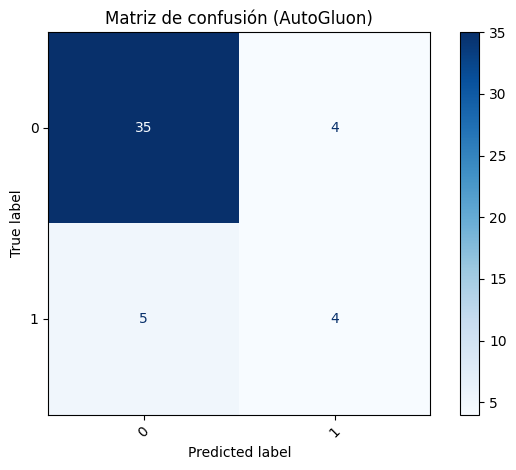

In [25]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
import os
import sys
from contextlib import redirect_stdout, redirect_stderr

warnings.filterwarnings("ignore")  # Silencia Warnings de librerías

# Prepara datos para AutoGluon (combina X e y)
train_data = X_train_sel.copy()
train_data['target'] = y_train

test_data  = X_test_sel.copy()
test_data['target'] = y_test

# Entrenamiento AutoML
predictor = TabularPredictor(
    label='target',
    eval_metric='f1_weighted'
).fit(
    train_data,
    time_limit=180,   # segundos máximo de búsqueda
    presets='best_quality',  # mayor calidad (puede alargar tiempo)
    verbosity=2
)

# Predicciones
y_pred = predictor.predict(test_data)

# Métricas
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score test: {f1:.3f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de confusión (AutoGluon)")
plt.tight_layout()
plt.show()

# Probabilidades estimadas
y_prob_train = predictor.predict_proba(train_data)
y_prob_test  = predictor.predict_proba(test_data)

In [8]:
from autogluon.tabular import TabularPredictor
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
import os
import sys
from contextlib import redirect_stdout, redirect_stderr


predictor = TabularPredictor.load("c:/Users/usuario/Desktop/TFG/predicciones/AutogluonModels/ag-20250623_161640")

leaderboard_df = predictor.leaderboard(silent=True)
print("Leaderboard:")
print(leaderboard_df[['model', 'score_val']])

best_model = leaderboard_df.iloc[leaderboard_df['score_val'].idxmax()]['model']
print("\nMejor modelo en validación:", best_model)

# Cargar modelo del ensamblado final manualmente
# Cargar modelo del ensamblado
model_names = ensemble_model.base_model_names  # puede ser también .model_names en versiones viejas

# Para cada modelo base, imprimir sus hiperparámetros
for model_name in model_names:
    model_obj = predictor._trainer.load_model(model_name)
    print(f'\nHiperparámetros del modelo {model_name}:')
    for k, v in model_obj.params.items():
        print(f'  {k}: {v}')


Leaderboard:
                          model  score_val
0           WeightedEnsemble_L2   0.948447
1   NeuralNetFastAI_r191_BAG_L1   0.943561
2     NeuralNetTorch_r79_BAG_L1   0.938712
3        NeuralNetFastAI_BAG_L1   0.937514
4         NeuralNetTorch_BAG_L1   0.886100
5             LightGBMXT_BAG_L1   0.876953
6               LightGBM_BAG_L1   0.874621
7                XGBoost_BAG_L1   0.867579
8          LightGBMLarge_BAG_L1   0.860624
9          LightGBM_r131_BAG_L1   0.852249
10         CatBoost_r177_BAG_L1   0.811161
11      RandomForestEntr_BAG_L1   0.798563
12           CatBoost_r9_BAG_L1   0.789817
13              CatBoost_BAG_L1   0.786795
14        ExtraTreesEntr_BAG_L1   0.780800
15      RandomForestGini_BAG_L1   0.771493
16          LightGBM_r96_BAG_L1   0.768544
17        ExtraTreesGini_BAG_L1   0.751602
18        KNeighborsUnif_BAG_L1   0.748203
19        KNeighborsDist_BAG_L1   0.741435

Mejor modelo en validación: WeightedEnsemble_L2

Hiperparámetros del modelo NeuralN

In [30]:
import pickle

# Ruta al modelo fold 1
fold_model_path = predictor.path + "/models/NeuralNetTorch_r79_BAG_L1/S1F1/model.pkl"

# Cargar manualmente el modelo
with open(fold_model_path, "rb") as f:
    loaded_model = pickle.load(f)

# Mostrar la arquitectura del modelo si existe
if hasattr(loaded_model, "model") and loaded_model.model is not None:
    print("📐 Arquitectura del modelo:")
    print(loaded_model.model)

    # Ver parámetros entrenables
    print("\n🔧 Parámetros entrenables:")
    for name, param in loaded_model.model.named_parameters():
        print(f"{name} - shape: {tuple(param.shape)}")
else:
    print("❌ No se pudo acceder al modelo de red neuronal.")



📐 Arquitectura del modelo:
EmbedNet(
  (main_block): Sequential(
    (0): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Linear(in_features=21, out_features=108, bias=True)
    (2): ELU(alpha=1.0)
    (3): BatchNorm1d(108, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.10077639529843717, inplace=False)
    (5): Linear(in_features=108, out_features=108, bias=True)
    (6): ELU(alpha=1.0)
    (7): BatchNorm1d(108, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Dropout(p=0.10077639529843717, inplace=False)
    (9): Linear(in_features=108, out_features=108, bias=True)
    (10): ELU(alpha=1.0)
    (11): BatchNorm1d(108, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Dropout(p=0.10077639529843717, inplace=False)
    (13): Linear(in_features=108, out_features=108, bias=True)
    (14): ELU(alpha=1.0)
    (15): Linear(in_features=108, out_features=2, bias=True)
  

F1 con decisión coste-sensitiva: 0.883


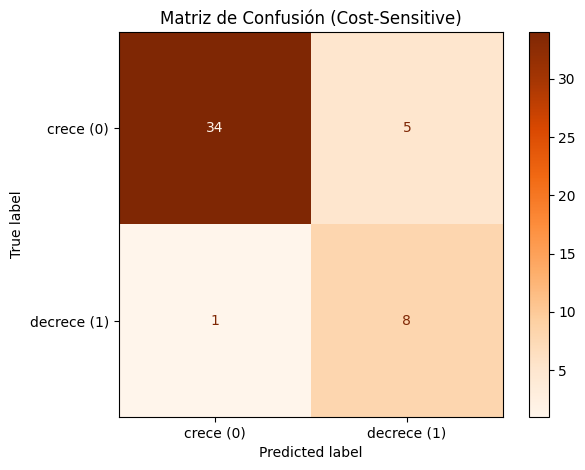

In [18]:
#0.2 / 0.35
import numpy as np
C = np.array([
    [ 0,  5],   # real=0 → (0→0)=0, (0→1)=1
    [15,  0],   # real=1 → (1→0)=10,(1→1)=0
])

# 2) Extraemos probabilidades del predictor sobre el conjunto de test:
#    AutoGluon devuelve DataFrame con columnas ['0','1'] (etiquetas)
y_prob_test = predictor.predict_proba(test_data)  # columnas ordenadas [0,1]

# 3) Convertimos a numpy array (n_muestras × 2)
probs = y_prob_test.values

# 4) Calculamos el coste esperado de predecir cada clase para cada muestra
#    cost_expected[i,j] = sum_k p_i[k] * C[k,j]
cost_expected = probs.dot(C)

# 5) Predicción coste-mínimo: elegimos j que minimiza cost_expected[i,j]
y_pred_cost = np.argmin(cost_expected, axis=1)

# 6) Evaluación sobre la verdad test_data['target']
y_true = test_data['target'].values
f1_cost = f1_score(y_true, y_pred_cost, average='weighted')
print(f"F1 con decisión coste-sensitiva: {f1_cost:.3f}")

# 7) Matriz de confusión “clásica”
cm = confusion_matrix(y_true, y_pred_cost, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=['crece (0)','decrece (1)'])
disp.plot(cmap='Oranges', xticks_rotation=0)
plt.title("Matriz de Confusión (Cost-Sensitive)")
plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Reporte completo: precision, recall, F1 por clase + macro/weighted avg
print("\nResumen completo de métricas:")
print(classification_report(y_true, y_pred_cost, digits=3, target_names=['crece (0)', 'decrece (1)']))


Resumen completo de métricas:
              precision    recall  f1-score   support

   crece (0)      0.971     0.872     0.919        39
 decrece (1)      0.615     0.889     0.727         9

    accuracy                          0.875        48
   macro avg      0.793     0.880     0.823        48
weighted avg      0.905     0.875     0.883        48



### SHAP

  0%|          | 0/6 [00:00<?, ?it/s]

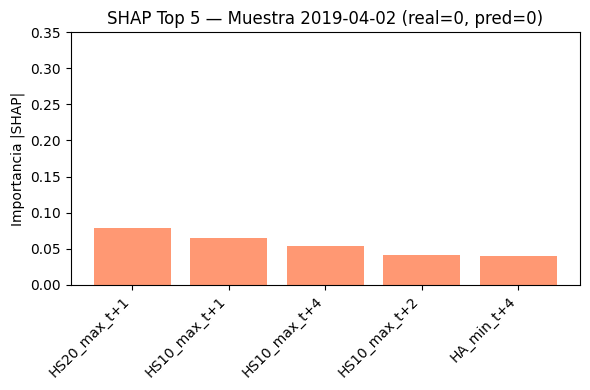

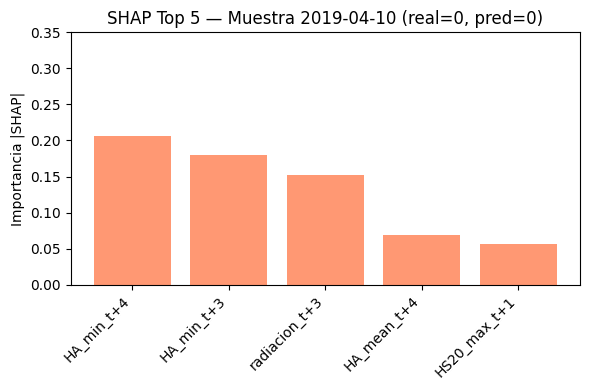

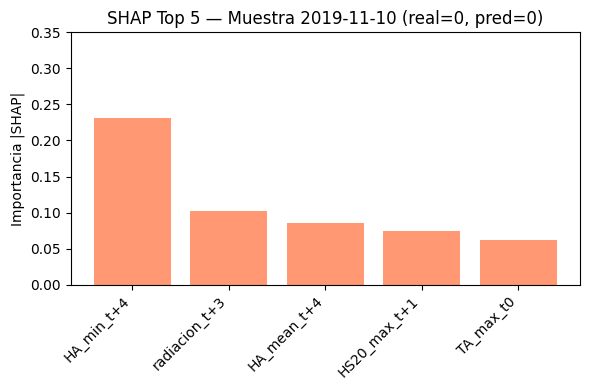

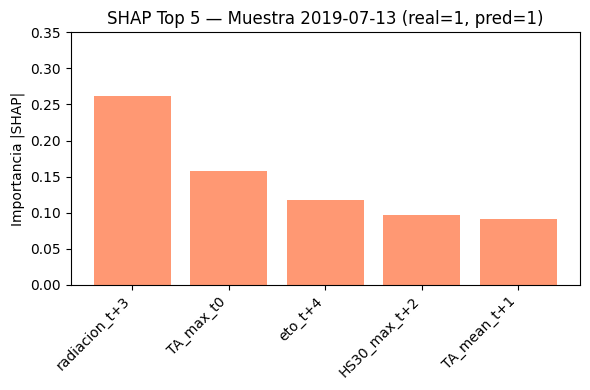

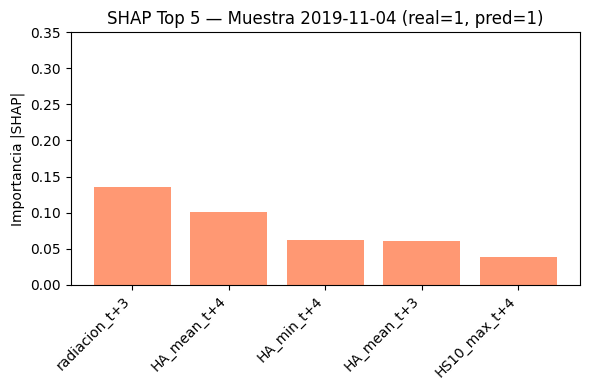

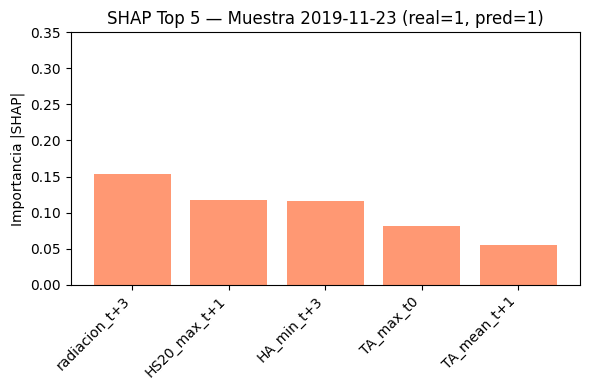

In [30]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Prepara las features y etiquetas del test
X_shap = X_test.copy()
y_true = y_test
y_pred = predictor.predict(X_test)

# 2) Selecciona índices de aciertos de cada clase
idx_crece   = X_shap[(y_true == 0) & (y_pred == 0)].index[:3]
idx_decrece = X_shap[(y_true == 1) & (y_pred == 1)].index[:3]
selected_idx = list(idx_crece) + list(idx_decrece)

def predict_fn(X_array):
    X_df = pd.DataFrame(X_array, columns=X_shap.columns)
    return predictor.predict_proba(X_df).values  # output: array (n_samples x n_classes)

# 3) Crea el explainer específico para modelos de árbol
X_background = X_shap.loc[selected_idx]# 4. Crear el KernelExplainer
explainer = shap.KernelExplainer(predict_fn, X_background)

# 4) Calcula SHAP values solo para esas muestras
X_explain   = X_shap.loc[selected_idx]
shap_values = explainer.shap_values(X_explain)
# shap_values[0]: array para clase 0, shap_values[1]: array para clase 1

# 5) Extrae y grafica las top 5 características por individuo
feature_names = X_shap.columns
top_n = 5

for i, idx in enumerate(selected_idx):
    true_cls = int(y_true.loc[idx])
    pred_cls = int(y_pred[idx])
    vals     = shap_values[pred_cls][i]
    abs_vals = np.abs(vals)
    
    top_idx   = np.argsort(abs_vals)[-top_n:][::-1]
    top_feats = feature_names[top_idx]
    top_vals  = abs_vals[top_idx]
    
    plt.figure(figsize=(6,4))
    plt.bar(top_feats, top_vals, color='coral', alpha=0.8)
    plt.title(f"SHAP Top {top_n} — Muestra {idx} (real={true_cls}, pred={pred_cls})")
    plt.ylabel("Importancia |SHAP|")
    plt.ylim(0, 0.35)  # <--- fija el eje Y
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [31]:
import numpy as np
import pandas as pd
import dice_ml
from dice_ml import Dice

# 1) Prepara el dataset para DiCE
df_dice = X_train_sel.copy()
df_dice['y'] = y_train

# 2) Define qué columnas son continuas (todas menos la etiqueta)
continuous = [c for c in df_dice.columns if c != 'y']

# 3) Variables que el agricultor puede modificar (prefijos suelo)
controllable_prefixes = ['HS10','HS20','HS30','HS40','HS50','HS60','TS30']
features_to_vary = [c for c in df_dice.columns if any(c.startswith(pref) for pref in controllable_prefixes)]

# 4) Crea la interfaz de datos
data_interface = dice_ml.Data(
    dataframe=df_dice,
    continuous_features=continuous,
    outcome_name='y'
)

# 5) Envuelve tu predictor de AutoGluon para DiCE
class AutoGluonWrapper:
    def __init__(self, predictor):
        self.predictor = predictor
    def predict_proba(self, X):
        # aseguramos columnas en el orden correcto
        X = X[self.predictor.feature_metadata.get_features()]
        preds = self.predictor.predict_proba(X)
        # forzamos ndarray float64 de forma (n,2)
        if isinstance(preds, pd.Series):
            arr = np.column_stack([1-preds.values, preds.values])
        elif isinstance(preds, pd.DataFrame):
            if {0,1}.issubset(preds.columns):
                arr = preds[[0,1]].values
            else:
                arr = preds.values
        else:
            arr = np.array(preds)
        return arr.astype(np.float64)

model_interface = dice_ml.Model(
    model=AutoGluonWrapper(predictor),
    backend="sklearn"
)

# 6) Crea el explainer (genético, random o kdtree)
exp = Dice(
    data_interface=data_interface,
    model_interface=model_interface,
    method="random"   # prueba también "random" o "kdtree"
)

# 7) Elige un ejemplo de decrecimiento bien predicho
mask = (y_test==1) & (predictor.predict(X_test_sel)==1)
idx = np.where(mask)[0][0]  # primer índice válido
X_query = X_test_sel.iloc[[idx]].reset_index(drop=True)

# 8) Genera 3 contrafactuales que pasen a 'crece' (clase 0)
cf = exp.generate_counterfactuals(
    X_query,
    total_CFs=3,
    desired_class=0,            # explícito: clase “crece”
    features_to_vary=features_to_vary,
    random_seed=7
)

# 9) Visualiza sólo los cambios
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:03<00:00,  3.11s/it]

Query instance (original outcome : 1)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,0.8079,0.3318,0.8031,0.5871,0.4408,26.68,28.459999,0.8061,28.25,6.0,...,22.219999,0.758763,34.490002,0.906,7.39,0.804343,0.8481,0.6779,0.7899,1



Diverse Counterfactual set (new outcome: 0)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,0.78788333,-,-,-,0.0
1,0.8209,-,-,-,-,-,-,-,-,-,...,-,0.80204101,-,-,-,-,-,-,-,0.0
2,-,-,0.7677,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0


In [32]:
# 1. Máscaras de ejemplos bien clasificados como 'decrece' (y = 1)
mask = (y_test == 1) & (predictor.predict(X_test_sel) == 1)
positions = np.where(mask)[0]

print(f"Se encontraron {len(positions)} ejemplos bien clasificados como 'decrece'.")

# 2. Recorremos hasta 5 ejemplos
for i, idx in enumerate(positions[:5]):
    print(f"\n📌 Ejemplo {i+1} en la posición {idx}:")

    # Extraemos el ejemplo a explicar
    X_query = X_test_sel.iloc[[idx]].reset_index(drop=True)

    # Generamos contrafactuales
    cf = exp.generate_counterfactuals(
        X_query,
        total_CFs=3,
        desired_class=0,
        features_to_vary=features_to_vary
    )

    # Mostramos los cambios
    display(cf.visualize_as_dataframe(show_only_changes=True))

Se encontraron 4 ejemplos bien clasificados como 'decrece'.

📌 Ejemplo 1 en la posición 2:


100%|██████████| 1/1 [00:02<00:00,  2.90s/it]

Query instance (original outcome : 1)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,0.8079,0.3318,0.8031,0.5871,0.4408,26.68,28.459999,0.8061,28.25,6.0,...,22.219999,0.758763,34.490002,0.906,7.39,0.804343,0.8481,0.6779,0.7899,1



Diverse Counterfactual set (new outcome: 0)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,-,-,0.7421,-,-,-,-,0.748,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,-,-,0.745,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.813,-,-,0.0
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.8623,-,0.8428,0.0


None


📌 Ejemplo 2 en la posición 39:


100%|██████████| 1/1 [00:02<00:00,  2.90s/it]

Query instance (original outcome : 1)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,0.7983,0.3122,0.7661,0.4364,0.3552,11.9,17.040001,0.8036,14.36,3.23,...,12.16,0.765898,25.74,0.727,2.96,0.747555,0.7986,0.5315,0.8021,1



Diverse Counterfactual set (new outcome: 0)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,-,-,-,-,-,-,-,-,-,-,...,-,0.7120655,-,-,-,0.70988687,-,-,-,0.0
1,-,-,-,-,-,-,-,-,-,-,...,-,0.71701359,-,-,-,-,-,-,-,0.0
2,0.8295,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.8414,-,-,0.0


None


📌 Ejemplo 3 en la posición 43:


100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

Query instance (original outcome : 1)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,0.8069,0.3443,0.755,0.6105,0.4588,10.7,13.04,0.7684,10.54,2.05,...,9.23,0.778523,17.09,0.6808,2.02,0.740495,0.7356,0.716,0.7983,1



Diverse Counterfactual set (new outcome: 0)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,-,-,-,-,-,-,-,-,-,-,...,-,0.7685137,-,-,-,-,-,-,-,0.0
1,0.8443,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
2,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,0.76731959,-,-,-,0.0


None


📌 Ejemplo 4 en la posición 45:


100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

Query instance (original outcome : 1)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,0.8107,0.4003,0.7595,0.734,0.6543,11.2,16.5,0.7661,15.16,2.35,...,10.36,0.775825,24.33,0.947,2.03,0.747641,0.7454,0.862,0.8013,1



Diverse Counterfactual set (new outcome: 0)


,HS10_max_t+4,HA_min_t+4,HS20_min_t+2,HA_mean_t+4,HA_min_t+3,radiacion_t+3,TA_mean_t+1,HS10_max_t+1,radiacion_t+1,eto_t+4,...,TA_min_t+1,HS10_mean_t+4,TA_max_t0,HA_max_t+1,eto_t+1,HS30_mean_t0,HS30_max_t+1,HA_mean_t+3,HS10_max_t+2,y
0,0.8527,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,0.8216132,-,-,-,0.0
2,0.845,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0


None